In [1]:
import numpy as np
from qiskit.circuit import Delay
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
import warnings
from qiskit.primitives import StatevectorSampler

import sys
import os

# Add "../../.." to the sys.path to use SteaneCodeCircuit class
sys.path.append(os.path.abspath("../../.."))
sys.path.append(os.path.abspath(".."))
from objects.steane_code_circuit import SteaneCodeCircuit
from functions.transpile import get_layout
from utils import get_transpile, TVD, load_experiment, run_experiment

In [2]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)

In [3]:
# Select backend
backend_name = 'ibm_sherbrooke'
backend = service.backend(backend_name)
sampler = SamplerV2(backend)
shots = 12800

In [4]:
# Get the dt of the selected backend in nano seconds
print(f" > dt in seconds: {backend.configuration().dt} s")
dt = backend.configuration().dt * 10**9
print(f" > dt in ns: {round(dt, 3)} ns")

 > dt in seconds: 2.2222222222222221e-10 s
 > dt in ns: 0.222 ns


In [5]:
t_array = [t*9_000 for t in range(0, 100, 10)]
print(f" > Delays in dt: {t_array}")
print(f" > Delays un us: {[round(t*dt * 10**(-3) , 3) for t in t_array]}")

 > Delays in dt: [0, 90000, 180000, 270000, 360000, 450000, 540000, 630000, 720000, 810000]
 > Delays un us: [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0]


In [6]:
# Load experiment of delay without initial layout:

state = '1'
basis = 'all'
error_correction = False
logical_operations = None
initial_layout = None
t_array_unit = 'dt' # Is dt by default

circuits, qc_circuits, initial_layout, estimated_durations = load_experiment(
    state, 
    basis, 
    error_correction, 
    backend, 
    transpile_iterations=10,
    t_array=t_array, 
    t_array_unit = t_array_unit,
    logical_operations = logical_operations, 
    initial_layout=initial_layout)

 > dt in seconds: 2.2222222222222221e-10 s
 > dt in ns: 0.222 ns
 > Initial layout: [122, 123, 121, 111, 124, 120, 125]
 > Delays in dt: [0, 90000, 180000, 270000, 360000, 450000, 540000, 630000, 720000, 810000]
 > Delays un us: [0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0]
Circuit Depth: 53
Delay Duration: 0.0 us
Estimated Total Duration: 8.526 us

Circuit Depth: 54
Delay Duration: 20.0 us
Estimated Total Duration: 28.526 us

Circuit Depth: 59
Delay Duration: 40.0 us
Estimated Total Duration: 49.06 us

Circuit Depth: 46
Delay Duration: 60.0 us
Estimated Total Duration: 67.289 us

Circuit Depth: 46
Delay Duration: 80.0 us
Estimated Total Duration: 87.289 us

Circuit Depth: 46
Delay Duration: 100.0 us
Estimated Total Duration: 107.289 us

Circuit Depth: 60
Delay Duration: 120.0 us
Estimated Total Duration: 129.116 us

Circuit Depth: 46
Delay Duration: 140.0 us
Estimated Total Duration: 147.289 us

Circuit Depth: 53
Delay Duration: 160.0 us
Estimated Total Duration: 16

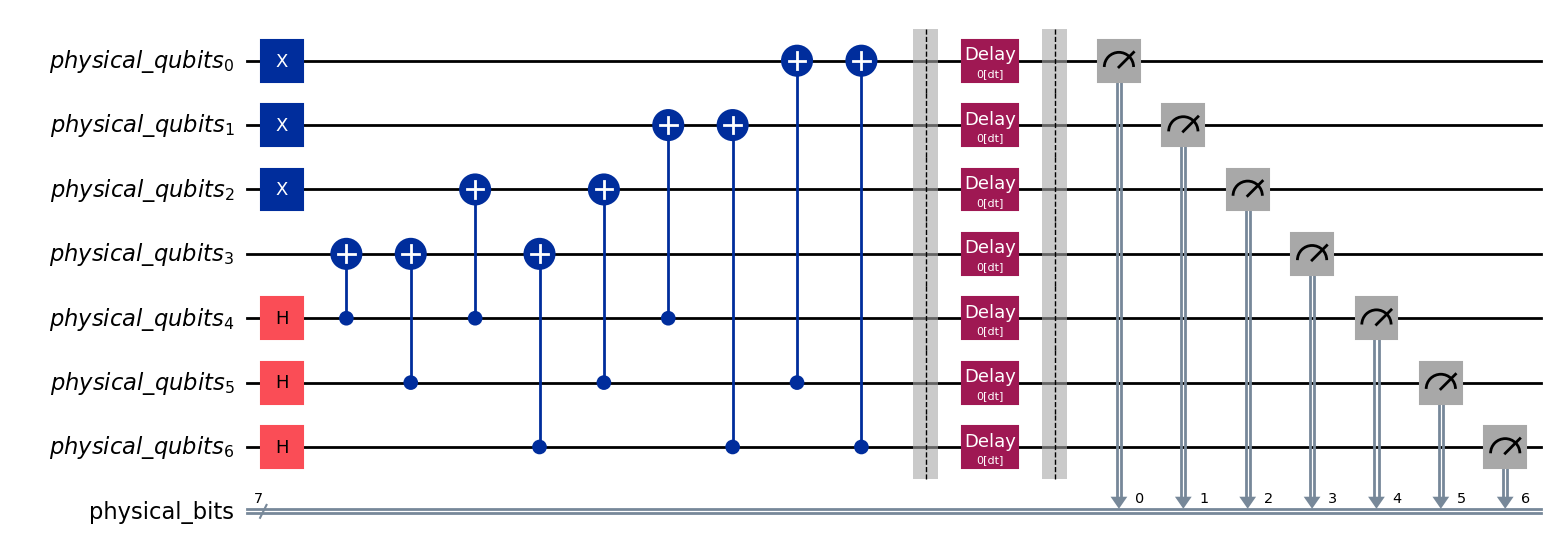

In [7]:
qc_circuits[0].draw("mpl")

In [8]:
# Define the valid states for the experiment
valid_states = ['1111111', '1110000', '1001100', '1000011', '0101010', '0100101', '0011001', '0010110']

expected_distribution = {}
for i in valid_states:
    expected_distribution[i] = 1/len(valid_states)

print(f" > Expected distribution if there is no errors:\n {expected_distribution}")

 > Expected distribution if there is no errors:
 {'1111111': 0.125, '1110000': 0.125, '1001100': 0.125, '1000011': 0.125, '0101010': 0.125, '0100101': 0.125, '0011001': 0.125, '0010110': 0.125}


In [9]:
experiment_name = 'delay_1_measureAll_noCorrection'
json_file = os.path.abspath("experiments.json")
encoder_type = '1'
t_array_unit = 'dt'
estimated_durations_units = 'us'

run_experiment(
    json_file, 
    experiment_name, 
    circuits, 
    shots, 
    sampler, 
    expected_distribution, 
    initial_layout, 
    estimated_durations, 
    estimated_durations_units,
    encoder_type,
    t_array = t_array,
    t_array_unit=t_array_unit)

 > job_id: cz2zdenkvm9g008fydjg
 > job_status: QUEUED
[
  {
    "job_id": "cz2zdenkvm9g008fydjg",
    "metadata": {
      "expected_distribution": {
        "1111111": 0.125,
        "1110000": 0.125,
        "1001100": 0.125,
        "1000011": 0.125,
        "0101010": 0.125,
        "0100101": 0.125,
        "0011001": 0.125,
        "0010110": 0.125
      },
      "t_array": [
        0,
        90000,
        180000,
        270000,
        360000,
        450000,
        540000,
        630000,
        720000,
        810000
      ],
      "initial_layout": [
        122,
        123,
        121,
        111,
        124,
        120,
        125
      ],
      "estimated_duration": [
        8.526222222222223,
        28.52622222222222,
        49.059555555555555,
        67.28888888888889,
        87.28888888888889,
        107.28888888888888,
        129.11644444444445,
        147.2888888888889,
        168.4693333333333,
        187.2888888888889
      ],
      "encoder_typ